<a href="https://colab.research.google.com/github/num1foryou/PCVK_Genap2023/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import files
import io
import matplotlib.pyplot as plt 

Saving 4.jpg to 4.jpg
nama file:  4.jpg


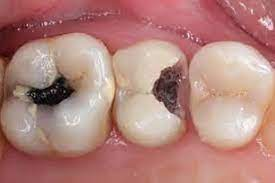

In [14]:
upload_files=files.upload()
for filename in upload_files.keys():upload_files.keys
print('nama file: ',filename)
citra=cv2.imread(filename)
cv2_imshow(citra)

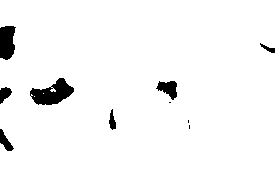

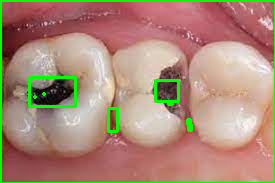

In [15]:
# Muat gambar di convert ke grayscale
imgr = citra
img = citra
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# menerapkan pemerataan histogram untuk meningkatkan kontras
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# Aplikasikan bilateral filter agar gambar jadi lebih smooth sambil mempertahankan tepi
gray = cv2.bilateralFilter(gray, 10, 80, 80)

# Threshold image untuk membuat binary mask
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

# mencari contours dalam binary mask
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#mengulangi contours dan menggambar segi empat disekitar gigi
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

# Show the resulting image
cv2_imshow(thresh)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()